In [1]:
#Libraries
library(bestNormalize)
library(dplyr)
library(MVN)
library(remotes)
library(caret)
library(car)
library(MVN)
library(dplyr)
library(psych)
library(ICSNP)
library(rstatix)
library(gridExtra)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Zorunlu paket yükleniyor: ggplot2

Zorunlu paket yükleniyor: lattice

Zorunlu paket yükleniyor: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Zorunlu paket yükleniyor: mvtnorm

Zorunlu paket yükleniyor: ICS


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
setwd("/Users/mehmeterkan/Desktop/4.Sınıf/4-1/STAT 467/STAT467_TERM_PROJECT_ekinsu_m.ali")

In [3]:
## Reading the Data and Arranging of data
data <- read.csv("dataR2.csv",header = TRUE)
head(data,5)
dim(data)
str(data)
anyNA(data)
##data <- data %>% select_if(., is.numeric)
summary(data)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114,1
2,83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786,1
3,82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697,1
4,68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220,1
5,86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920,1


[1] 116  10

'data.frame':	116 obs. of  10 variables:
 $ Age           : int  48 83 82 68 86 49 89 76 73 75 ...
 $ BMI           : num  23.5 20.7 23.1 21.4 21.1 ...
 $ Glucose       : int  70 92 91 77 92 92 77 118 97 83 ...
 $ Insulin       : num  2.71 3.12 4.5 3.23 3.55 ...
 $ HOMA          : num  0.467 0.707 1.01 0.613 0.805 ...
 $ Leptin        : num  8.81 8.84 17.94 9.88 6.7 ...
 $ Adiponectin   : num  9.7 5.43 22.43 7.17 4.82 ...
 $ Resistin      : num  8 4.06 9.28 12.77 10.58 ...
 $ MCP.1         : num  417 469 555 928 774 ...
 $ Classification: int  1 1 1 1 1 1 1 1 1 1 ...


[1] FALSE

      Age            BMI           Glucose          Insulin      
 Min.   :24.0   Min.   :18.37   Min.   : 60.00   Min.   : 2.432  
 1st Qu.:45.0   1st Qu.:22.97   1st Qu.: 85.75   1st Qu.: 4.359  
 Median :56.0   Median :27.66   Median : 92.00   Median : 5.925  
 Mean   :57.3   Mean   :27.58   Mean   : 97.79   Mean   :10.012  
 3rd Qu.:71.0   3rd Qu.:31.24   3rd Qu.:102.00   3rd Qu.:11.189  
 Max.   :89.0   Max.   :38.58   Max.   :201.00   Max.   :58.460  
      HOMA             Leptin        Adiponectin        Resistin     
 Min.   : 0.4674   Min.   : 4.311   Min.   : 1.656   Min.   : 3.210  
 1st Qu.: 0.9180   1st Qu.:12.314   1st Qu.: 5.474   1st Qu.: 6.882  
 Median : 1.3809   Median :20.271   Median : 8.353   Median :10.828  
 Mean   : 2.6950   Mean   :26.615   Mean   :10.181   Mean   :14.726  
 3rd Qu.: 2.8578   3rd Qu.:37.378   3rd Qu.:11.816   3rd Qu.:17.755  
 Max.   :25.0503   Max.   :90.280   Max.   :38.040   Max.   :82.100  
     MCP.1         Classification 
 Min.   :  45

In [4]:
## Summary and correlation matrix 
summary(data)
colMeans(data)# obtain mean vector
var(data)# obtain var-cov matrix
cor(data)# obtain cor matrix

      Age            BMI           Glucose          Insulin      
 Min.   :24.0   Min.   :18.37   Min.   : 60.00   Min.   : 2.432  
 1st Qu.:45.0   1st Qu.:22.97   1st Qu.: 85.75   1st Qu.: 4.359  
 Median :56.0   Median :27.66   Median : 92.00   Median : 5.925  
 Mean   :57.3   Mean   :27.58   Mean   : 97.79   Mean   :10.012  
 3rd Qu.:71.0   3rd Qu.:31.24   3rd Qu.:102.00   3rd Qu.:11.189  
 Max.   :89.0   Max.   :38.58   Max.   :201.00   Max.   :58.460  
      HOMA             Leptin        Adiponectin        Resistin     
 Min.   : 0.4674   Min.   : 4.311   Min.   : 1.656   Min.   : 3.210  
 1st Qu.: 0.9180   1st Qu.:12.314   1st Qu.: 5.474   1st Qu.: 6.882  
 Median : 1.3809   Median :20.271   Median : 8.353   Median :10.828  
 Mean   : 2.6950   Mean   :26.615   Mean   :10.181   Mean   :14.726  
 3rd Qu.: 2.8578   3rd Qu.:37.378   3rd Qu.:11.816   3rd Qu.:17.755  
 Max.   :25.0503   Max.   :90.280   Max.   :38.040   Max.   :82.100  
     MCP.1         Classification 
 Min.   :  45

Age            BMI        Glucose        Insulin           HOMA 
     57.301724      27.582111      97.793103      10.012086       2.694988 
        Leptin    Adiponectin       Resistin          MCP.1 Classification 
     26.615080      10.180874      14.725966     534.647000       1.551724

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,259.6212144,0.6899654,83.515142,5.271382,7.4547030,31.72129299,-24.23770282,0.5473753,75.03014,-0.35052474
BMI,0.6899654,25.2017631,15.700527,7.343449,2.0931033,54.85332909,-10.40030222,12.1513148,389.04875,-0.33244976
Glucose,83.5151424,15.7005265,507.382909,114.444261,57.1155552,131.82711499,-18.82467930,81.3098725,2063.87004,4.32383808
Insulin,5.2713825,7.3434492,114.444261,101.359945,34.1811235,58.22217076,-2.15621156,18.3041243,607.20600,1.39193463
HOMA,7.4547030,2.0931033,57.115555,34.181124,13.2644786,22.86097050,-1.40413211,10.4289668,326.96236,0.51664932
Leptin,31.7212930,54.8533291,131.827115,58.222171,22.8609705,367.99877146,-12.52242698,60.9050169,92.95764,-0.01033331
Adiponectin,-24.2377028,-10.4003022,-18.824679,-2.156212,-1.4041321,-12.52242698,46.83132218,-21.3987474,-475.08370,-0.06661929
Resistin,0.5473753,12.1513148,81.309873,18.304124,10.4289668,60.90501687,-21.39874737,153.5281003,1570.73824,1.40678196
MCP.1,75.0301391,389.0487525,2063.870043,607.205999,326.9623612,92.95763779,-475.08370238,1570.7382390,119655.57060,15.78824348
Classification,-0.3505247,-0.3324498,4.323838,1.391935,0.5166493,-0.01033331,-0.06661929,1.4067820,15.78824,0.24947526


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000000,0.008529857,0.2301056,0.03249535,0.12703259,0.102626049,-0.21981289,0.002741708,0.01346168,-0.043554681
BMI,0.008529857,1.000000000,0.1388452,0.14529526,0.11448013,0.569592606,-0.30273476,0.195350206,0.22403821,-0.132585740
Glucose,0.230105617,0.138845189,1.0000000,0.50465307,0.69621182,0.305079936,-0.12212131,0.291327462,0.26487927,0.384315377
Insulin,0.032495353,0.145295260,0.5046531,1.00000000,0.93219777,0.301461618,-0.03129608,0.146730986,0.17435580,0.276803714
HOMA,0.127032593,0.114480131,0.6962118,0.93219777,1.00000000,0.327209864,-0.05633712,0.231101229,0.25952919,0.284012222
Leptin,0.102626049,0.569592606,0.3050799,0.30146162,0.32720986,1.000000000,-0.09538874,0.256233522,0.01400862,-0.001078457
Adiponectin,-0.219812891,-0.302734758,-0.1221213,-0.03129608,-0.05633712,-0.095388740,1.00000000,-0.252363303,-0.20069450,-0.019490280
Resistin,0.002741708,0.195350206,0.2913275,0.14673099,0.23110123,0.256233522,-0.25236330,1.000000000,0.36647421,0.227310296
MCP.1,0.013461678,0.224038215,0.2648793,0.17435580,0.25952919,0.014008623,-0.20069450,0.366474210,1.00000000,0.091380517
Classification,-0.043554681,-0.132585740,0.3843154,0.27680371,0.28401222,-0.001078457,-0.01949028,0.227310296,0.09138052,1.000000000


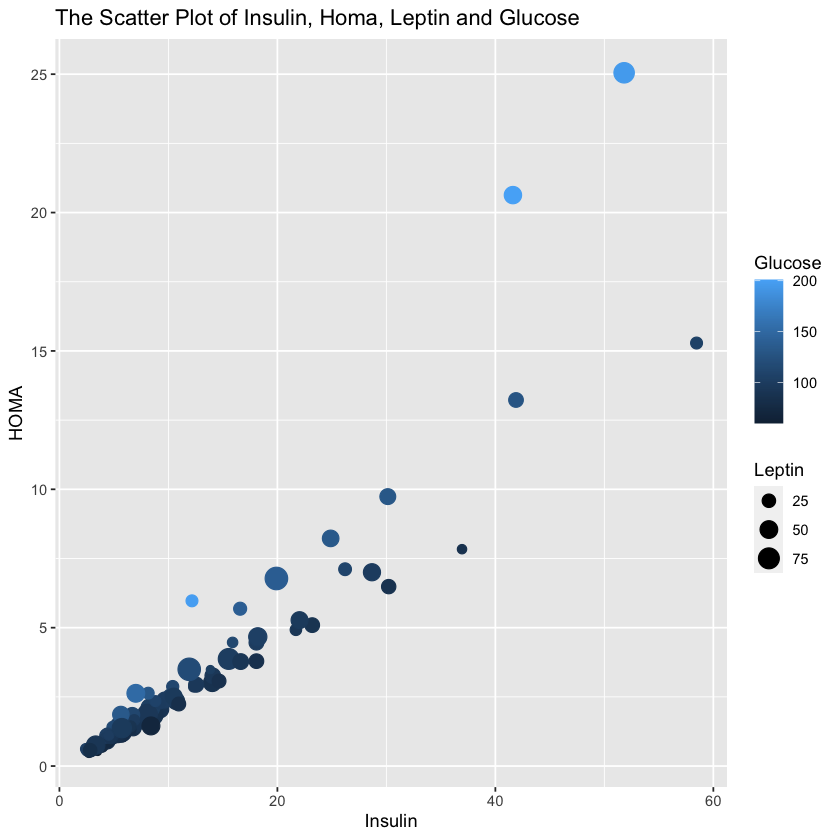

In [5]:
## The Scatter Plot of Insulin, Homa, Leptin and Glucose
ggplot(data,aes(x=Insulin, y = HOMA, size= Leptin, colour= Glucose))+ geom_point()+labs(title = "The Scatter Plot of Insulin, Homa, Leptin and Glucose")

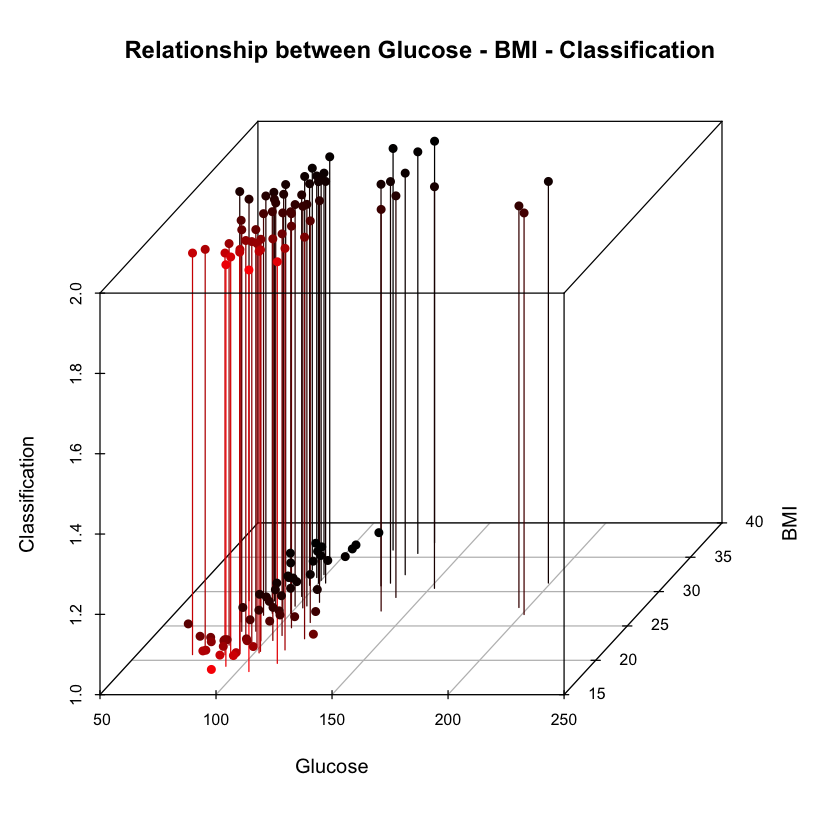

In [6]:
library(scatterplot3d)
div<-data[,c("Glucose", "BMI","Classification")]
s3d <- scatterplot3d(div, type="h", highlight.3d=TRUE,
                     angle=55, scale.y=0.7, pch=16, main = "Relationship between Glucose - BMI - Classification")

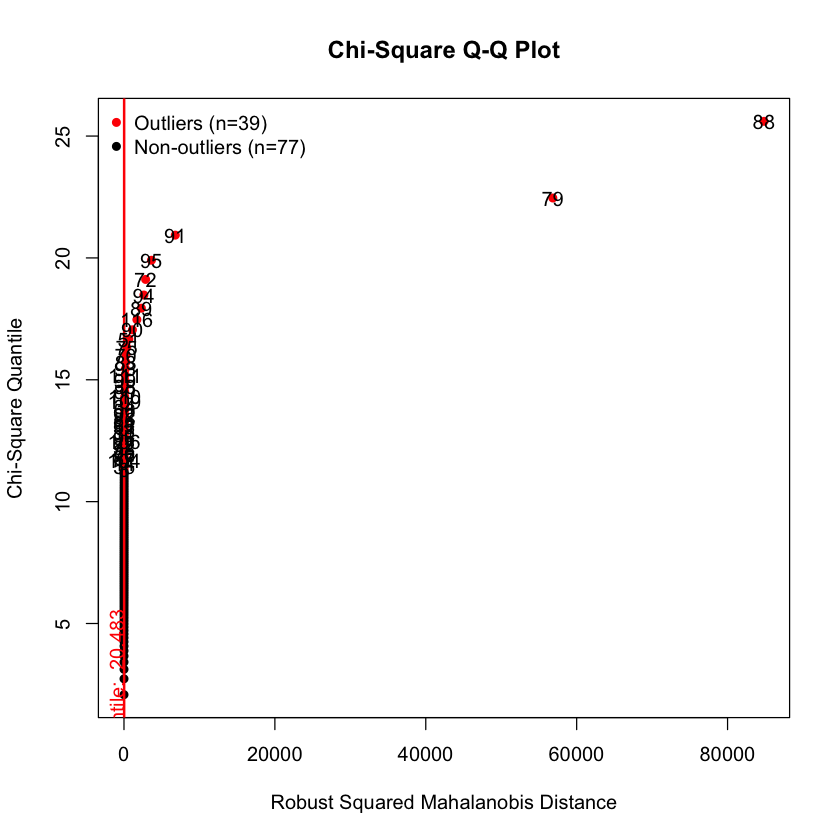

In [7]:
## Outlier Detection
### Mahalanobis distance
result <- mvn(data = data, mvnTest = "royston", multivariateOutlierMethod = "quan")

In [ ]:
#We observed that there are 39 outliers in the dataset.

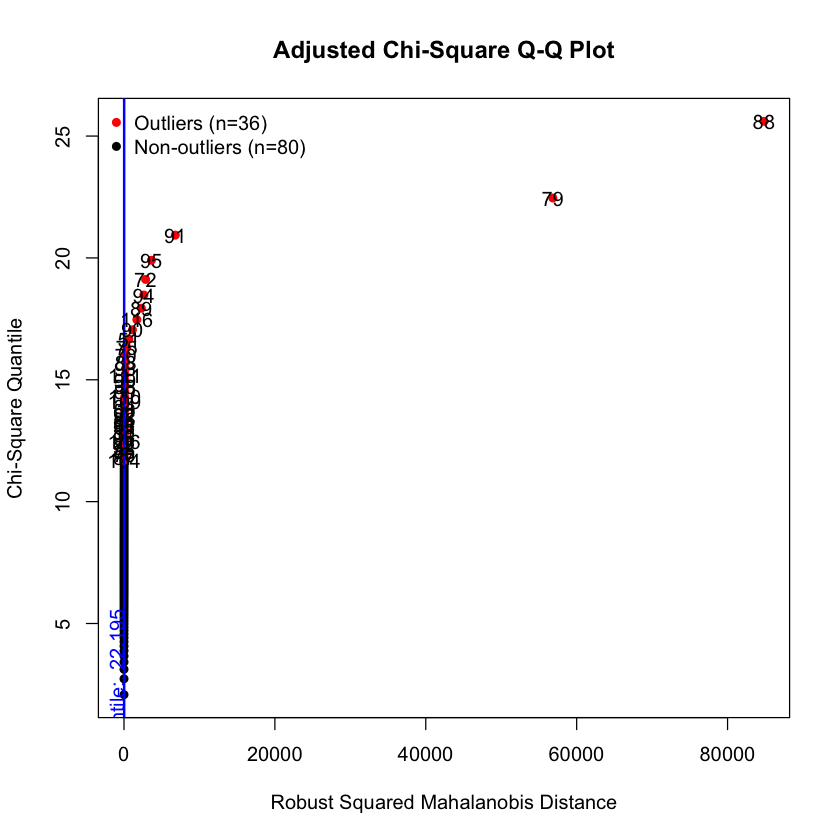

In [8]:
### Adjusted Mahalanobis distance
result <- mvn(data = data, mvnTest = "royston", multivariateOutlierMethod = "adj")

In [ ]:
#We observerd that there are 36 outliers in the data.

In [9]:
## Checking Normality
### Multivariate Normality
result <- mvn(data = data, mvnTest = "royston")
result$multivariateNormality

Test,H,p value,MVN
<chr>,<dbl>,<dbl>,<chr>
Royston,376.482,1.673679e-75,NO


In [ ]:
#H0 : The data follows normal distribution.
#H1: The data does not follow normal distribution.

#Since p-value is smaller than the significance level, we reject the null hypothesis.
#Data doesn't follow a normal distribution.

,Test,Variable,Statistic,p value,Normality
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,Anderson-Darling,Age,1.2798,0.0024,NO
2,Anderson-Darling,BMI,1.0044,0.0116,NO
3,Anderson-Darling,Glucose,7.2534,<0.001,NO
4,Anderson-Darling,Insulin,11.9541,<0.001,NO
5,Anderson-Darling,HOMA,15.3034,<0.001,NO
6,Anderson-Darling,Leptin,4.4178,<0.001,NO
7,Anderson-Darling,Adiponectin,5.6917,<0.001,NO
8,Anderson-Darling,Resistin,7.3220,<0.001,NO
9,Anderson-Darling,MCP.1,2.8996,<0.001,NO


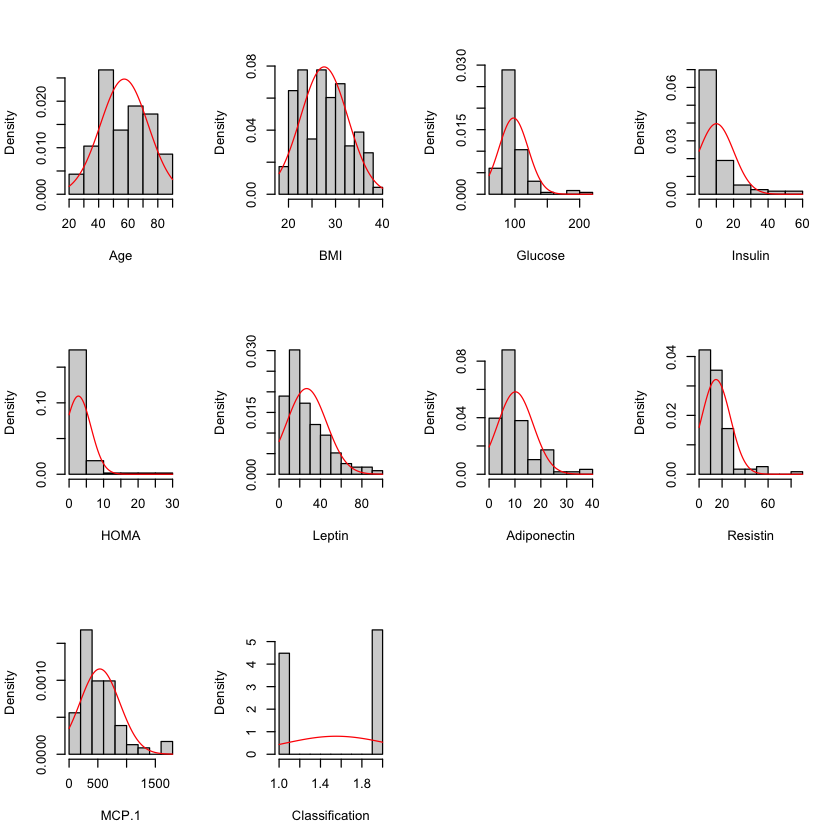

In [10]:
### Univariate Normality
result <- mvn(data = data, mvnTest = "royston", univariatePlot = "histogram")
result$univariateNormality

In [ ]:
#As seen in the p-values of the variables, none of them are normal.

In [11]:
## Normalizing Variables
#According to the result, we choose the best method.
#Normalize Age 
bestNormalize(data$Age)
data$Age <- orderNorm(data$Age)$x.t

#Normalize BMI
bestNormalize(data$BMI)
data$BMI <- orderNorm(data$BMI)$x.t

#Normalize Glucose
bestNormalize(data$Glucose)
data$Glucose <- orderNorm(data$Glucose)$x.t

#Normalize Insulin
bestNormalize(data$Insulin)
data$Insulin <- boxcox(data$Insulin)$x.t

#Normalize HOMA
bestNormalize(data$HOMA)
data$HOMA <- boxcox(data$HOMA)$x.t

#Normalize Leptin
bestNormalize(data$Leptin)
data$Leptin <- yeojohnson(data$Leptin)$x.t

#Normalize Adiponectin
bestNormalize(data$Adiponectin)
data$Adiponectin <- arcsinh_x(data$Adiponectin)$x.t

#Normalize Resistin
bestNormalize(data$Resistin)
data$Resistin <- log_x(data$Resistin)$x.t

#Normalize MCP.1
bestNormalize(data$MCP.1)
data$MCP.1 <- yeojohnson(data$MCP.1)$x.t

Best Normalizing transformation with 116 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 1.5976
 - Box-Cox: 1.4164
 - Center+scale: 1.4097
 - Exp(x): 14.137
 - Log_b(x+a): 1.583
 - orderNorm (ORQ): 1.2182
 - sqrt(x + a): 1.4467
 - Yeo-Johnson: 1.4164
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
orderNorm Transformation with 116 nonmissing obs and ties
 - 51 unique values 
 - Original quantiles:
  0%  25%  50%  75% 100% 
  24   45   56   71   89 

Warning message in orderNorm(data$Age):
“Ties in data, Normal distribution not guaranteed
”


Best Normalizing transformation with 116 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 1.2606
 - Box-Cox: 1.3697
 - Center+scale: 1.3412
 - Exp(x): 11.9915
 - Log_b(x+a): 1.2606
 - orderNorm (ORQ): 1.1418
 - sqrt(x + a): 1.32
 - Yeo-Johnson: 1.3697
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
orderNorm Transformation with 116 nonmissing obs and ties
 - 110 unique values 
 - Original quantiles:
    0%    25%    50%    75%   100% 
18.370 22.973 27.662 31.241 38.579 

Warning message in orderNorm(data$BMI):
“Ties in data, Normal distribution not guaranteed
”


Best Normalizing transformation with 116 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 1.7861
 - Box-Cox: 1.3612
 - Center+scale: 2.1006
 - Exp(x): 7.2158
 - Log_b(x+a): 1.7861
 - orderNorm (ORQ): 1.2139
 - sqrt(x + a): 1.8758
 - Yeo-Johnson: 1.2642
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
orderNorm Transformation with 116 nonmissing obs and ties
 - 50 unique values 
 - Original quantiles:
    0%    25%    50%    75%   100% 
 60.00  85.75  92.00 102.00 201.00 

Warning message in orderNorm(data$Glucose):
“Ties in data, Normal distribution not guaranteed
”


Best Normalizing transformation with 116 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 1.5636
 - Box-Cox: 1.1048
 - Center+scale: 3.6612
 - Exp(x): 14.3479
 - Log_b(x+a): 1.5576
 - orderNorm (ORQ): 1.2964
 - sqrt(x + a): 2.437
 - Yeo-Johnson: 1.1121
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
Standardized Box Cox Transformation with 116 nonmissing obs.:
 Estimated statistics:
 - lambda = -0.5365855 
 - mean (before standardization) = 1.175123 
 - sd (before standardization) = 0.235389 

Best Normalizing transformation with 116 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 1.8655
 - Box-Cox: 1.1624
 - Center+scale: 3.8994
 - Exp(x): 12.9527
 - Log_b(x+a): 1.4376
 - orderNorm (ORQ): 1.3661
 - sqrt(x + a): 2.5691
 - Yeo-Johnson: 1.2297
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
Standardized Box Cox Transformation with 116 nonmissing obs.:
 Estimated statistics:
 - lambda = -0.4666038 
 - mean (before standardization) = 0.3596977 
 - sd (before standardization) = 0.6076841 

Best Normalizing transformation with 116 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 1.0339
 - Box-Cox: 0.9873
 - Center+scale: 2.4079
 - Exp(x): 13.2861
 - Log_b(x+a): 1.0067
 - orderNorm (ORQ): 1.063
 - sqrt(x + a): 1.3994
 - Yeo-Johnson: 0.9679
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
Standardized Yeo-Johnson Transformation with 116 nonmissing obs.:
 Estimated statistics:
 - lambda = -0.07134026 
 - mean (before standardization) = 2.764913 
 - sd (before standardization) = 0.5394034 

Best Normalizing transformation with 116 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 1.1461
 - Box-Cox: 1.2073
 - Center+scale: 2.1721
 - Exp(x): 14.5442
 - Log_b(x+a): 1.1394
 - orderNorm (ORQ): 1.1927
 - sqrt(x + a): 1.5279
 - Yeo-Johnson: 1.1873
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
Standardized Log_b(x + a) Transformation with 116 nonmissing obs.:
 Relevant statistics:
 - a = 0 
 - b = 10 
 - mean (before standardization) = 0.9263276 
 - sd (before standardization) = 0.2658365 

Best Normalizing transformation with 116 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 1.1733
 - Box-Cox: 1.217
 - Center+scale: 2.4715
 - Exp(x): 10.2006
 - Log_b(x+a): 1.1715
 - orderNorm (ORQ): 1.423
 - sqrt(x + a): 1.6539
 - Yeo-Johnson: 1.2121
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
Standardized Log_b(x + a) Transformation with 116 nonmissing obs.:
 Relevant statistics:
 - a = 0 
 - b = 10 
 - mean (before standardization) = 1.057934 
 - sd (before standardization) = 0.3011705 

Best Normalizing transformation with 116 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 1.1461
 - Box-Cox: 1.1552
 - Center+scale: 1.6133
 - Log_b(x+a): 1.1461
 - orderNorm (ORQ): 1.2061
 - sqrt(x + a): 1.0842
 - Yeo-Johnson: 1.1552
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
Standardized sqrt(x + a) Transformation with 116 nonmissing obs.:
 Relevant statistics:
 - a = 0 
 - mean (before standardization) = 22.01002 
 - sd (before standardization) = 7.116369 

In [12]:
## Checking the Normality after Normalization

### Multivariate Normality

result <- mvn(data = data, mvnTest = "royston")
result$multivariateNormality

Test,H,p value,MVN
<chr>,<dbl>,<dbl>,<chr>
Royston,64.80457,1.105582e-10,NO


In [ ]:
#H0 : The data follows normal distribution.
#H1: The data does not follow normal distribution.

#Since p-value is smaller than the significance level, we reject the null hypothesis.
#Data doesn't follow normal distribution.

,Test,Variable,Statistic,p value,Normality
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,Anderson-Darling,Age,0.0633,0.9996,YES
2,Anderson-Darling,BMI,0.0115,1,YES
3,Anderson-Darling,Glucose,0.0675,0.9995,YES
4,Anderson-Darling,Insulin,0.6098,0.1104,YES
5,Anderson-Darling,HOMA,0.4763,0.2343,YES
6,Anderson-Darling,Leptin,0.5382,0.1643,YES
7,Anderson-Darling,Adiponectin,0.3970,0.3633,YES
8,Anderson-Darling,Resistin,0.3788,0.4007,YES
9,Anderson-Darling,MCP.1,0.2991,0.5795,YES


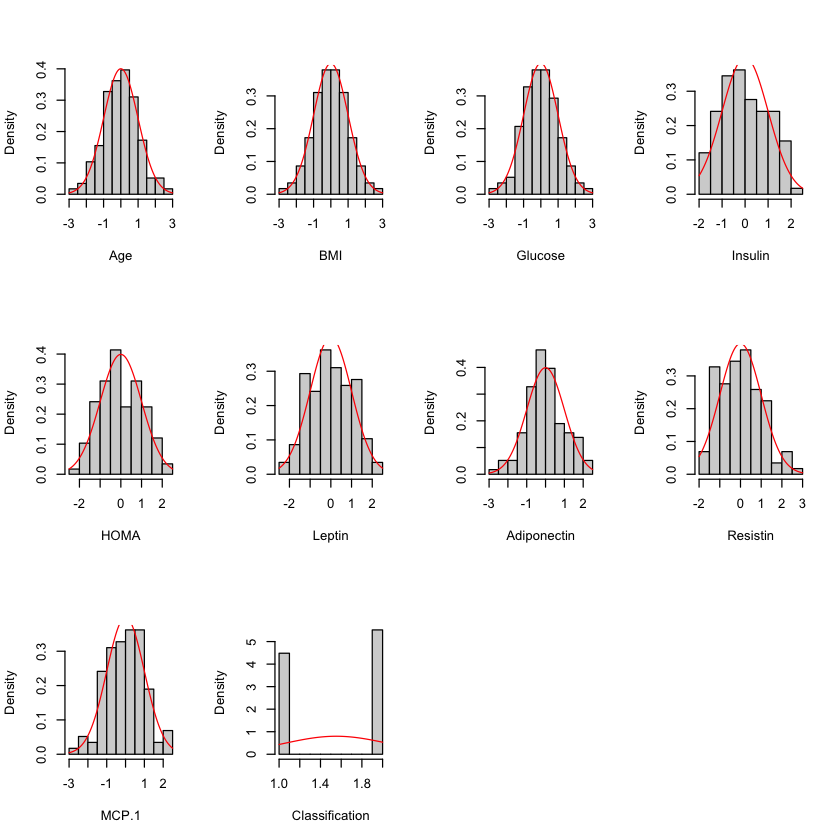

In [13]:
#### Univariaye Normality
result <- mvn(data = data, mvnTest = "royston", univariatePlot = "histogram")
result$univariateNormality

In [ ]:
#After, normalization, univariate normality is satisfied.

In [14]:
## Principal Component Analysis

### Checking the Dimension
dim(data)
str(data)

[1] 116  10

'data.frame':	116 obs. of  10 variables:
 $ Age           : num  -0.399 1.589 1.484 0.483 2.023 ...
 $ BMI           : num  -0.532 -1.67 -0.608 -1.13 -1.286 ...
 $ Glucose       : num  -2.1144 -0.0757 -0.1847 -1.4835 -0.0757 ...
 $ Insulin       : num  -1.715 -1.378 -0.608 -1.298 -1.087 ...
 $ HOMA          : num  -2.094 -1.212 -0.576 -1.498 -0.967 ...
 $ Leptin        : num  -1.22 -1.214 -0.207 -1.057 -1.604 ...
 $ Adiponectin   : num  0.224 -0.728 1.608 -0.274 -0.922 ...
 $ Resistin      : num  -0.515 -1.491 -0.301 0.16 -0.112 ...
 $ MCP.1         : num  -0.1414 0.0343 0.2962 1.1662 0.8468 ...
 $ Classification: int  1 1 1 1 1 1 1 1 1 1 ...


Warning message in applyDefaults(diagonal, defaults = list(method = "adaptiveDensity"), :
“unnamed diag arguments, will be ignored”


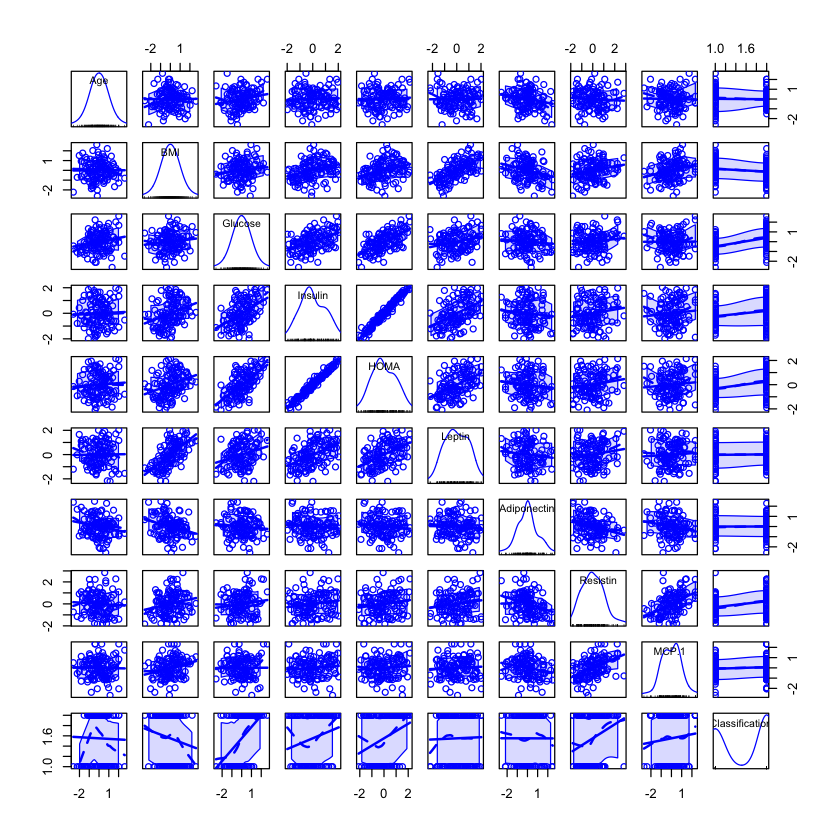

In [15]:
#### Observing Factor Variable 
scatterplotMatrix(data,diagonal = "histogram")

In [ ]:
#The classification variable is a a factor. So, continue the process by omitting it for a while.

function (distinct = FALSE) 
{
    c <- .Call(C_colors)
    if (distinct) 
        c[!duplicated(t(col2rgb(c)))]
    else c
}
<bytecode: 0x7fdba0dc00c8>
<environment: namespace:grDevices>

[1] 116   9

Warning message in applyDefaults(diagonal, defaults = list(method = "adaptiveDensity"), :
“unnamed diag arguments, will be ignored”


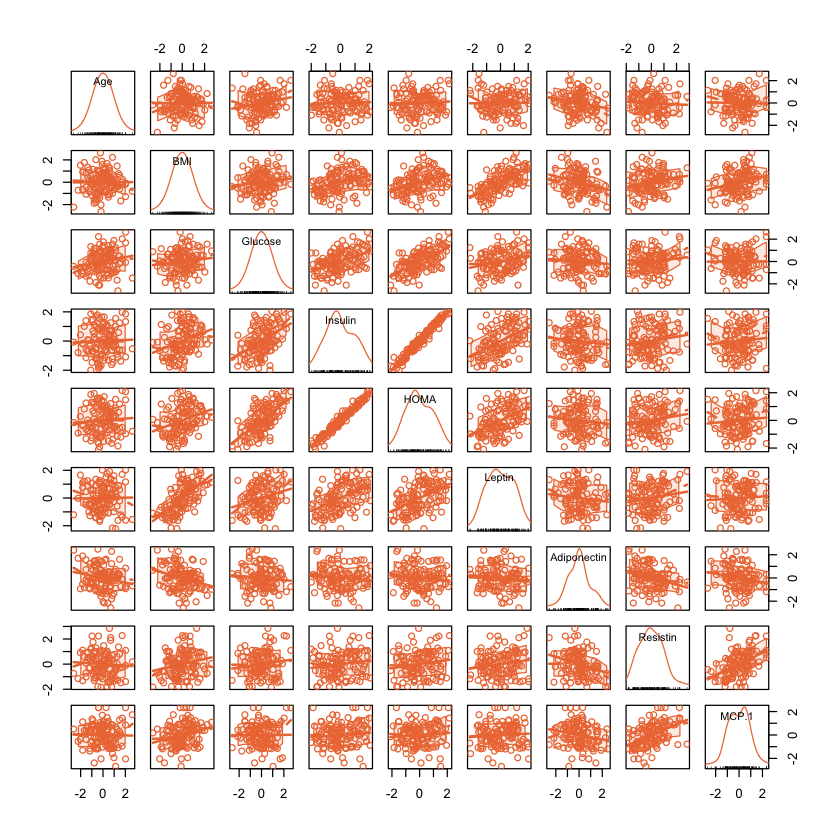

In [16]:
#### Checking Correlation of the Variables
grDevices::colors
ndata <-data[,-10] ##removing factor variable
dim(ndata) #our dimensions are now 116 and 9.
scatterplotMatrix(ndata, diagonal="histogram",col="sienna2")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



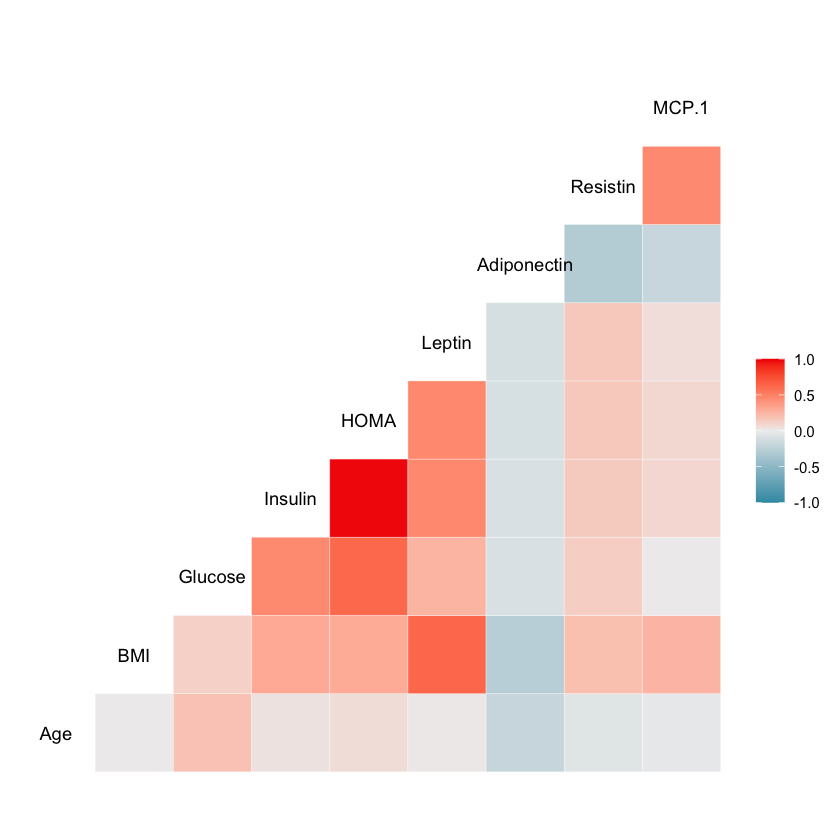

In [17]:
library(GGally)
ggcorr(ndata, method = c("everything", "pearson"))

In [ ]:
#From both plots we can observe that correlation of the variables are good for PCA. Scale of the variables are different(from the scatter plot), before PCA,
#we should scale them.

In [18]:
### Scaling
n2data<-scale(ndata)
head(n2data,2) #first two row of the scaled data.

Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
-0.400239,-0.5324933,-2.12015839,-1.714892,-2.094322,-1.219946,0.2235865,-0.5148888,-0.14142922
1.594891,-1.6724761,-0.07627985,-1.378208,-1.211511,-1.214063,-0.7280632,-1.4907664,0.03428653


In [19]:
##### Checking covariance and correlation

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Age,1.000000000,0.004914044,0.192389730,0.03777759,0.06478845,0.01230530,-0.19602600,-0.05905502,-0.019627588
BMI,0.004914044,1.000000000,0.120414194,0.30364800,0.30114279,0.63414729,-0.26722405,0.20272612,0.251638118
Glucose,0.192389730,0.120414194,1.000000000,0.45986169,0.62184794,0.25381550,-0.08925143,0.13290413,0.004974064
Insulin,0.037777589,0.303647995,0.459861686,1.00000000,0.97952728,0.46666921,-0.08999139,0.14863014,0.089718864
HOMA,0.064788454,0.301142792,0.621847938,0.97952728,1.00000000,0.46896394,-0.10023937,0.16197351,0.084397790
Leptin,0.012305298,0.634147288,0.253815497,0.46666921,0.46896394,1.00000000,-0.10822653,0.16100659,0.056225153
Adiponectin,-0.196026003,-0.267224051,-0.089251426,-0.08999139,-0.10023937,-0.10822653,1.00000000,-0.28909752,-0.188842963
Resistin,-0.059055021,0.202726116,0.132904133,0.14863014,0.16197351,0.16100659,-0.28909752,1.00000000,0.455000453
MCP.1,-0.019627588,0.251638118,0.004974064,0.08971886,0.08439779,0.05622515,-0.18884296,0.45500045,1.000000000


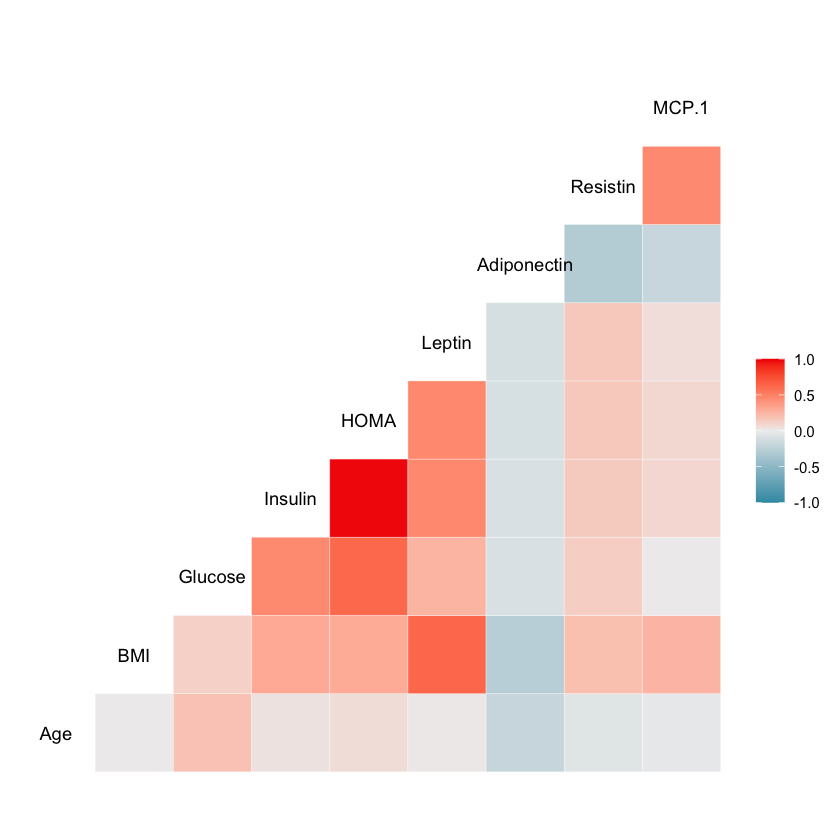

In [20]:
cor(n2data)
library(GGally)
ggcorr(n2data, method = c("everything", "pearson"))

In [ ]:
#After scaling we again check the correlation of the variables. Since HOMA and
#Insulin will be our response, we remove them for now. We are gonna use them during
#principal component regression.

In [21]:
#### Obtaining Principle Components
n3data <- n2data[,-c(4,5)] ##removing response
pca1 <- prcomp(n3data)
summary(pca1)

Importance of components:
                         PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.464 1.1377 1.0834 0.9402 0.83617 0.71163 0.54808
Proportion of Variance 0.306 0.1849 0.1677 0.1263 0.09988 0.07234 0.04291
Cumulative Proportion  0.306 0.4909 0.6586 0.7849 0.88474 0.95709 1.00000

In [22]:
#we can see that the first four components nearly explain the 80% variability in data.

#### Obtaining Eigenvalues
pca1$sdev

[1] 1.4635859 1.1376775 1.0833787 0.9401669 0.8361664 0.7116267 0.5480844

In [ ]:
#First four eigenvalues are nearly 1 or above 1.

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



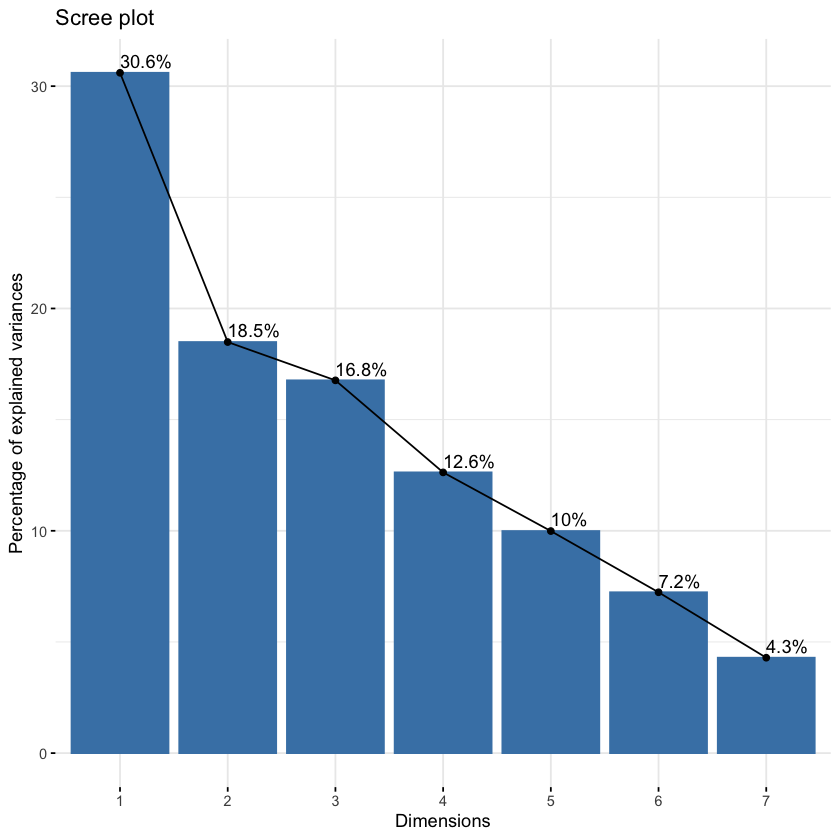

In [23]:
library(factoextra) #produce ggplot graphs
fviz_eig(pca1,addlabels=TRUE,col="sienna2") #represent the proportion values

In [ ]:
#Four component seems okay from the scree plot. Also, we observed that four components
#explain the 78.49% variability in data. We continue with the first four components.

In [24]:
#### Extracting first 4 components
pca<-pca1$x[,1:4]
head(pca)

PC1,PC2,PC3,PC4
-1.7543078,-1.2940989,-0.3485861,-1.3380590
-1.6644751,0.2957792,2.2474271,-0.6791751
-0.9425373,0.3830980,0.5672000,0.4293221
-0.8141679,-1.8202962,0.9425597,-0.7641782
-0.6569309,-0.7104477,2.8644184,-0.4337890
-1.4272125,-0.8966280,0.3041717,0.6306725


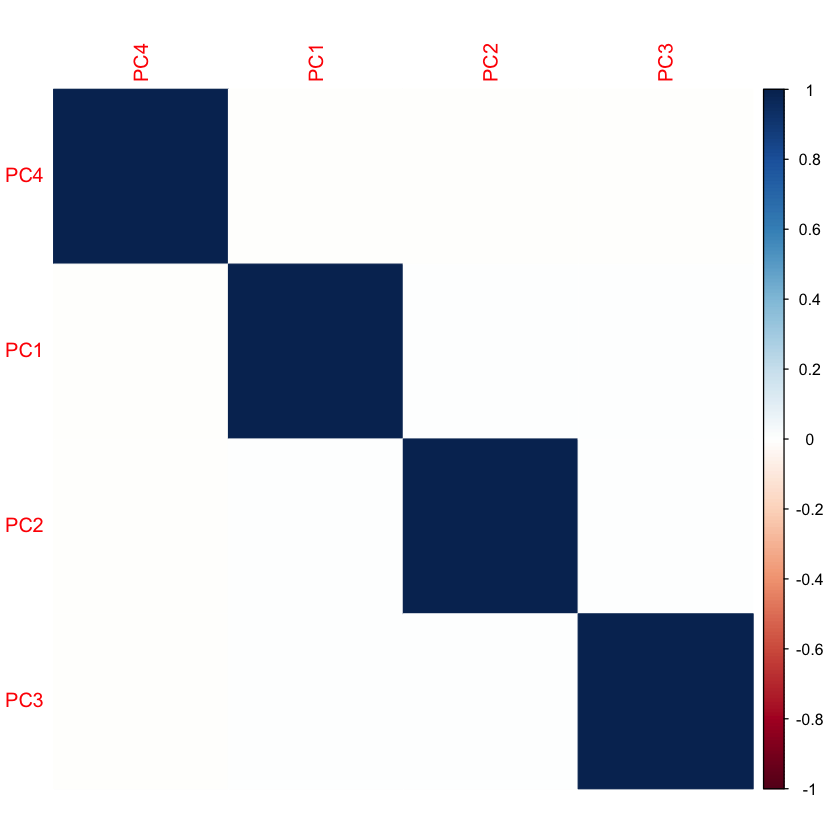

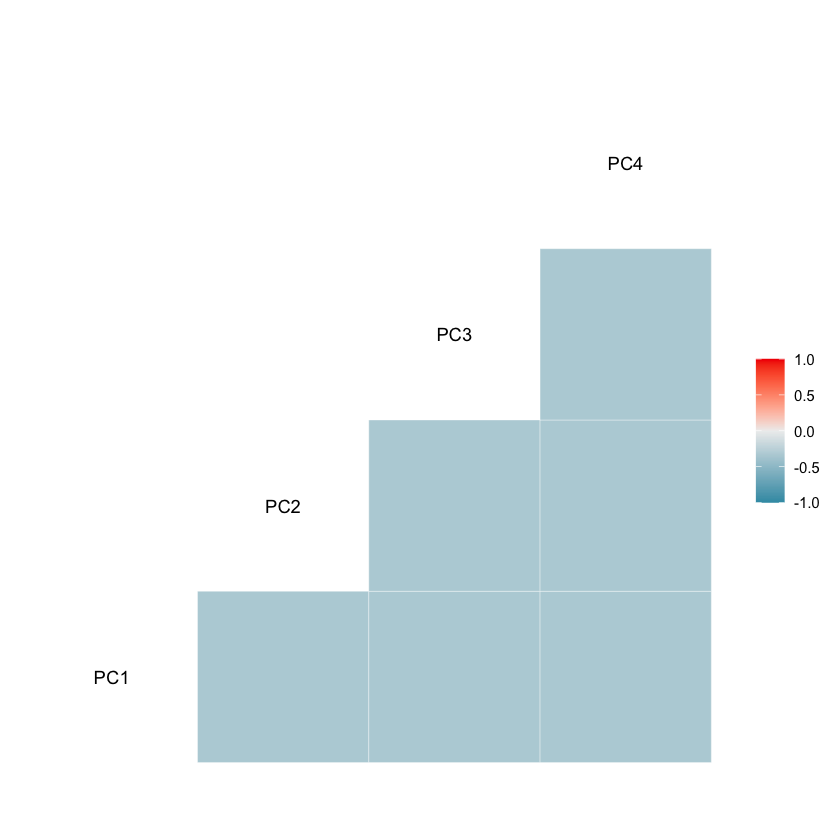

In [25]:
###### linearity of the components
res1 <- cor(pca, method="pearson")
corrplot::corrplot(res1, method= "color", order = "hclust")
ggcorr(res1, method = c("everything", "pearson"))

In [ ]:
#All components are linearly independent since their correlations are 0.

In [26]:
##### Interpretation of the Components
cor(n3data,pca)

,PC1,PC2,PC3,PC4
Age,0.1234575,0.4013896,0.74425187,-0.20239975
BMI,0.7653600,0.2202011,-0.36066473,-0.27393188
Glucose,0.3668419,0.4746081,0.28793469,0.68563259
Leptin,0.6719581,0.4620263,-0.42135976,-0.03041939
Adiponectin,-0.5371351,0.1131741,-0.45666194,0.44421208
Resistin,0.6161955,-0.5131530,0.12084092,0.29446678
MCP.1,0.5354946,-0.6081549,0.07827094,0.11338845


In [ ]:
#The first component positively correlated with every variable except Adiponectin.
#The component most correlated with BMI.
#The second component positively correlated with every variable except
#Resistin and MCP.1. The component most correlated with MCP.1.
#The third component positively correlated with every variable except
#BMI,Leptin,Adiponectin. The component most correlated with MCP.1.
#The fourth component positively correlated with every variable except
#Age,BMI,Leptin. The component most correlated with Glucose.

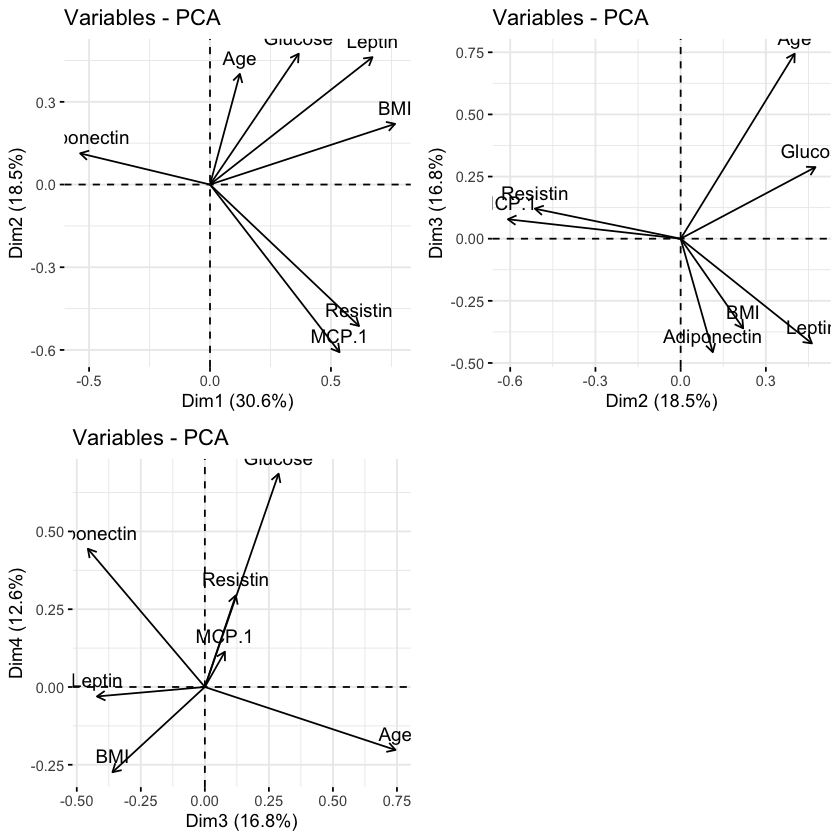

In [27]:
##### Loading Plots
a <- fviz_pca_var(pca1,axes = c(1, 2))
b <- fviz_pca_var(pca1,axes = c(2, 3))
c <- fviz_pca_var(pca1,axes = c(3, 4))
gridExtra::grid.arrange(a,b,c, ncol=2)

In [ ]:
#Leptin,BMI,Resistin,MCP.1 influence PC1 while Adiponectin influence PC2.
#Age,Glucose,Leptin,BMI,Adiponections influence PC2 while MCP.1 and Resistin strongly influence PC3.
#Age influence PC3 while Leptin,Adiponectin, BMI have more say in PC4.

In [28]:
## Factor Analysis
factanal(n2data, factors = 1, method ="mle")$PVAL #Since p value is less than 0.05, we reject H0.

objective 
8.356756e-62

In [29]:
factanal(n2data, factors = 2, method ="mle")$PVAL #Since p value is less than 0.05, we reject H0.

objective 
1.250602e-22

In [30]:
factanal(n2data, factors = 3, method ="mle")$PVAL #Since p value is less than 0.05, we reject H0.

objective 
1.632918e-13

In [31]:
factanal(n2data, factors = 4, method ="mle")$PVAL #Since p value is less than 0.05, we reject H0.

objective 
1.829359e-10

In [32]:
factanal(n2data, factors = 5, method ="mle")$PVAL #Since p value is less than 0.05, we reject H0.

objective 
1.659969e-12

In [ ]:
#factanal(n2data, factors = 6, method ="mle")$PVAL

#Error in factanal(n2data, factors = 6, method = "mle") :
#6 factors are too many for 9 variables

#We got the errors that states "6 factors are too many for 9 variables."

#The data set does not suitable for the factor analysis, since we try the
#every possible number of factors.

In [33]:
#Research Question 1:

#Is there a relationship between Insulin and HOMA level on blood and  AGE, BMI 
#and other hormones?

## Principal Component Regression 1
ols.data <- data.frame(Insulin=data[,4],HOMA=data[,5],pca) #combining PC and response
lmodel <- lm(cbind(Insulin,HOMA) ~ ., data = ols.data)
summary(lmodel)

Response Insulin :

Call:
lm(formula = Insulin ~ PC1 + PC2 + PC3 + PC4, data = ols.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18829 -0.55075 -0.00861  0.60884  2.46972 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.727e-17  7.723e-02   0.000 1.000000    
PC1          2.894e-01  5.299e-02   5.461 2.93e-07 ***
PC2          2.546e-01  6.818e-02   3.734 0.000299 ***
PC3         -6.256e-02  7.159e-02  -0.874 0.384115    
PC4          2.698e-01  8.250e-02   3.271 0.001429 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8318 on 111 degrees of freedom
Multiple R-squared:  0.3322,	Adjusted R-squared:  0.3082 
F-statistic: 13.81 on 4 and 111 DF,  p-value: 3.588e-09


Response HOMA :

Call:
lm(formula = HOMA ~ PC1 + PC2 + PC3 + PC4, data = ols.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76778 -0.45507  0.00626  0.52114  2.37283 

Coefficients:
              Esti

In [ ]:
#Both model are significant since their p-values are smaller than 0.05.
#In the first model, coefficient of intercept and PC3 are insignificant. In the
#second model, again intercept and PC3 are insignificant. R-Squared values of both model
#are very small. Components are not good for explaining the response variables.

In [34]:
mean((ols.data$Insulin - predict(lmodel))^2)
mean((ols.data$HOMA - predict(lmodel))^2)

[1] 0.6735252

[1] 0.5332797

In [ ]:
#Also, MSE of the both model are pretty high, again indication of not being a good model.

In [35]:
### Multivariate Multiple Linear Regression 1
mlm1 <- lm(cbind(Insulin, HOMA) ~ .-Classification, data = data)
summary(mlm1)

Response Insulin :

Call:
lm(formula = Insulin ~ (Age + BMI + Glucose + Leptin + Adiponectin + 
    Resistin + MCP.1 + Classification) - Classification, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09864 -0.54134 -0.01804  0.57190  2.41520 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0001605  0.0773361  -0.002 0.998348    
Age         -0.0386830  0.0817939  -0.473 0.637216    
BMI          0.0125844  0.1077858   0.117 0.907272    
Glucose      0.3735138  0.0829045   4.505 1.69e-05 ***
Leptin       0.3591940  0.1051572   3.416 0.000897 ***
Adiponectin -0.0088957  0.0858658  -0.104 0.917679    
Resistin     0.0071172  0.0918176   0.078 0.938357    
MCP.1        0.0588322  0.0901847   0.652 0.515560    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8329 on 108 degrees of freedom
Multiple R-squared:  0.3484,	Adjusted R-squared:  0.3062 
F-statistic: 8.251 on 7 and 108 DF, 

In [ ]:
#Both models are significant since their p-value is smaller than the significance level.
#Also, all the coefficients in the models are significant except intercepts. However,
#R-Squared values are very low, these variables are not good at explaining the Insulin and HOMA 
#level in the blood.

In [36]:
mean((ols.data$Insulin - predict(mlm1))^2)
mean((ols.data$HOMA - predict(mlm1))^2)

[1] 0.6597791

[1] 0.5131732

In [37]:
#From the MSE value of the principal component regression and multivariate regression,
#we can say that multivariate regression model is more preferable since its MSE values
#is smaller but not too much smaller.

Glucose,BMI
<dbl>,<dbl>
-2.11438077,-0.5318533
-0.07570327,-1.6704641
-0.18472049,-0.6081267
-1.48353986,-1.1296572
-0.07570327,-1.2864792
-0.07570327,-0.7439668
-1.48353986,-0.8022406
1.23853638,-0.4826978
0.28471556,-0.9965860


Test,Statistic,p value,Result
<chr>,<fct>,<fct>,<chr>
Mardia Skewness,0.594977465093747,0.963620166184331,YES
Mardia Kurtosis,-0.968967044513033,0.332561632211285,YES
MVN,NA,NA,YES


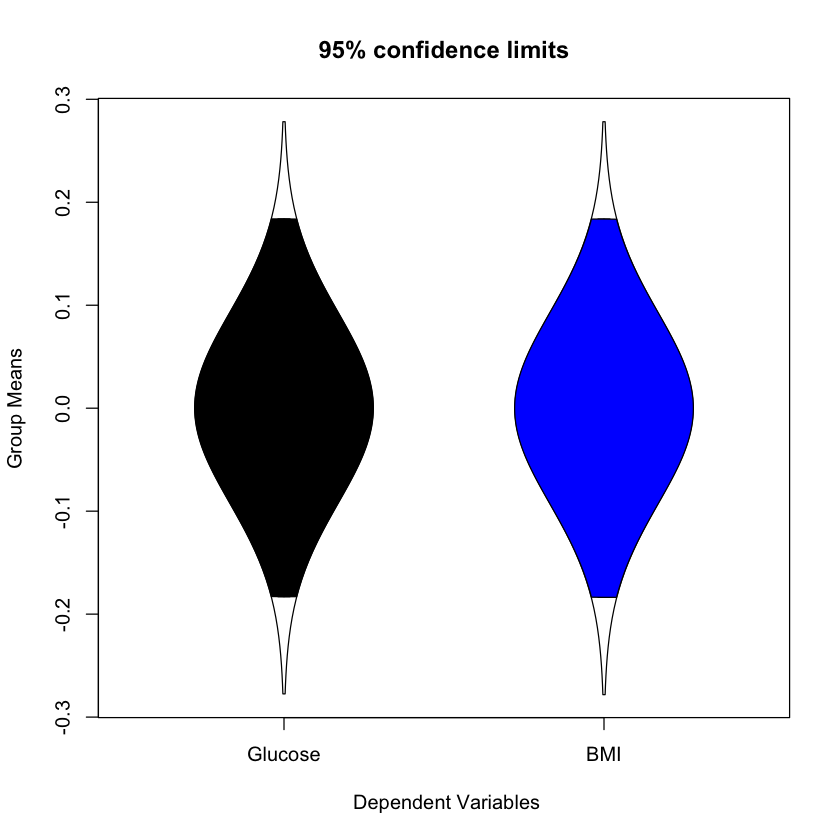

In [38]:
## Hostelling For Glucose and BMI

#Suppose that we’d like to test the null hypothesis that the observations come from the mean vector of the responses variables M0 = [1000,1000]

#Since we normalize data before we can continue our process.

library(ICSNP)
#assumption of this test is that the samples should follow normal distribution
y <- data %>% select(Glucose, BMI)
y
mu0=c(1000,1000)
library(MVN)

#We know the assumption of this test is that the samples should follow normal distribution.
test<-mvn(y,mvnTest = "mardia")
test$multivariateNormality

#The normality is satisfied.

#Before starting the formal tests, let’s visualize our response matrix.
library (psych)
error.bars (y, ylab="Group Means", xlab=" Dependent Variables")

In [39]:
library(ICSNP)
HotellingsT2(y,mu=log(mu0))


	Hotelling's one sample T2-test

data:  y
T.2 = 4915.5, df1 = 2, df2 = 114, p-value < 2.2e-16
alternative hypothesis: true location is not equal to c(6.90775527898214,6.90775527898214)


In [40]:
#Since p<a we reject H0. Therefore, we don’t have enough evidence to conclude that the transformassion of the mean vector equals to log(1000,1000).

In [41]:
#Research Question 2:

#Research Question: Does the classification have a significant effect on Glucose and BMI variables?

#When we compare two independent samples in multivariate analysis.
subset_data <-data%>%select(Glucose,BMI,Classification)
table(subset_data$Classification) #Since the frequency of one gender bigger than 7, we can continue to use mvn package here.


 1  2 
52 64 

In [42]:
## Normality Assumption is satisfied.

library(rstatix)
subset_data %>% group_by(Classification) %>% shapiro_test(Glucose,BMI)

Classification,variable,statistic,p
<int>,<chr>,<dbl>,<dbl>
1,BMI,0.9912889,0.9672168
1,Glucose,0.9927813,0.9875542
2,BMI,0.9924906,0.9661037
2,Glucose,0.9917227,0.9469261


In [43]:
#We fail to reject the null hypothesis and conclude that data follows univariate normality.

In [44]:
## Now, variance - covariance matrix assumptions
#Null hypothesis: variance-covariance matrix are equal for each combination formed by each group in the independent variable

In [45]:
library(broom)
library(heplots)
boxM(Y = cbind(subset_data$Glucose,subset_data$BMI), group = factor(subset_data$Classification))


	Box's M-test for Homogeneity of Covariance Matrices

data:  cbind(subset_data$Glucose, subset_data$BMI)
Chi-Sq (approx.) = 2.1852, df = 3, p-value = 0.5349


In [46]:
#As the p-value is non-significant (p > 0.05) for Box's M test, we fail to reject the null hypothesis and conclude that variance-covariance matrices are equal for each combination of the dependent variable for.

#All assumptions are satisfied.

#After that we will conduct the hypothesis.

In [47]:
HotellingsT2(cbind(subset_data$Glucose,subset_data$BMI) ~ subset_data$Classification)


	Hotelling's two sample T2-test

data:  cbind(subset_data$Glucose, subset_data$BMI) by subset_data$Classification
T.2 = 17.308, df1 = 2, df2 = 113, p-value = 2.772e-07
alternative hypothesis: true location difference is not equal to c(0,0)


In [48]:
#Since p<alpha we reject to HO.
#Therefore, we have enough evidence to prove that the mean of responses change with respect to classification.

[1] 0.9

[1] 0.6923077

Confusion Matrix and Statistics

          Reference
Prediction 1 2
         1 9 4
         2 1 8
                                          
               Accuracy : 0.7727          
                 95% CI : (0.5463, 0.9218)
    No Information Rate : 0.5455          
    P-Value [Acc > NIR] : 0.02455         
                                          
                  Kappa : 0.5528          
                                          
 Mcnemar's Test P-Value : 0.37109         
                                          
            Sensitivity : 0.9000          
            Specificity : 0.6667          
         Pos Pred Value : 0.6923          
         Neg Pred Value : 0.8889          
             Prevalence : 0.4545          
         Detection Rate : 0.4091          
   Detection Prevalence : 0.5909          
      Balanced Accuracy : 0.7833          
                                          
       'Positive' Class : 1               
                                          

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 1, case = 2

Setting direction: controls < cases



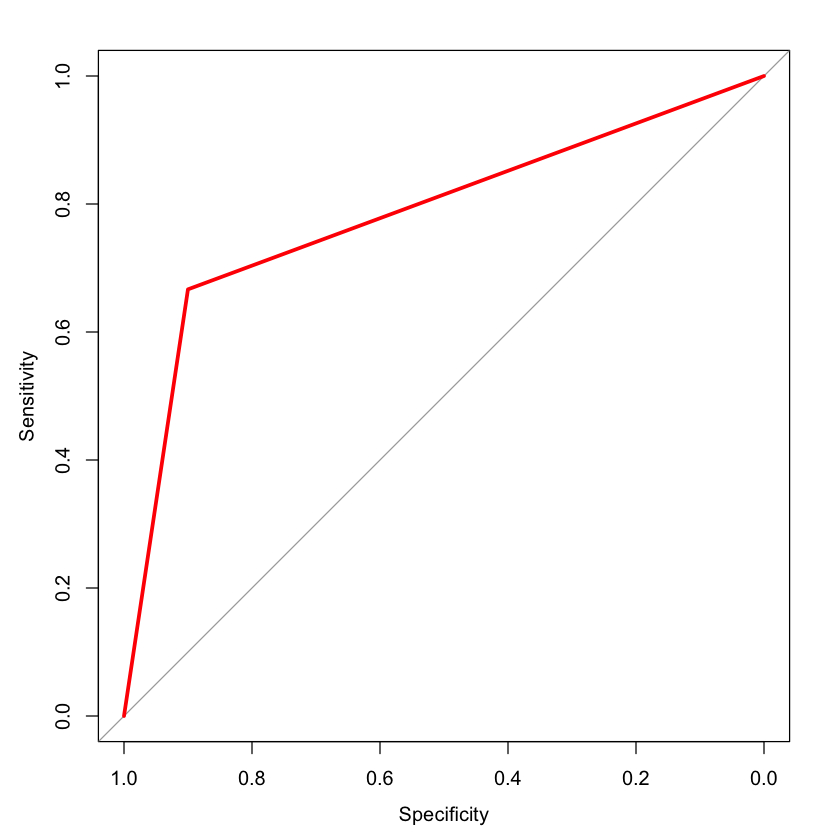

In [50]:
## Classification/Discrimination Analysis

#Research Question 3:
#Research Question: How accurate is the classification for detecting the disease?

set.seed(3500)
data$Classification <- factor(data$Classification)
##I normalize the input columns, by scaling and centering them, as follows:
preProcess <- c("center","scale")

#split the dataset into training and test set
i <- createDataPartition(y = data$Classification, times = 1, p = 0.8, list = FALSE)

training_set <- data[i,]
test_set <- data[-i,]

#set cross-validation
trControl <- trainControl(method = "repeatedcv",number = 10,repeats = 10)

#Model Training
model <- train(Classification ~ ., method='knn', data = training_set, metric='Accuracy',preProcess = preProcess, trControl=trControl)

#Model Evaluation
test_set$pred <- predict(model, test_set)

test_set$factor_pred <- as.factor(test_set$pred)

test_set$factor_truth <- as.factor(test_set$Classification)

precision <- posPredValue(test_set$factor_truth, test_set$factor_pred)
precision

recall <- sensitivity(test_set$factor_truth, test_set$factor_pred)
recall

cm <- confusionMatrix(test_set$pred, test_set$Classification)
cm

accuracy <- cm$overall[1]

confusion_matrix <- cm$table

#RocCurve

library(pROC)
test_set$pred <- predict(model, test_set,probability=TRUE)
roc_curve = roc(test_set$Classification, predictor=factor(test_set$pred,ordered = TRUE))
plot(roc_curve, col="red", lwd=3)